In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\shiva\Downloads\crop_production.csv')

In [3]:
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [6]:
df.shape

(246091, 7)

In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df.Production.mean()

582503.4422509839

In [9]:
df.fillna(df.Production.mean())
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
df['Production'].isnull().sum()

3730

In [11]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [12]:
len(df['Crop'].unique())

124

In [13]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [14]:
len(df['State_Name'].unique())

33

In [15]:
 df.Crop.value_counts(7)

Rice                 0.061376
Maize                0.056674
Moong(Green Gram)    0.041928
Urad                 0.040026
Sesamum              0.036759
                       ...   
Pear                 0.000024
Plums                0.000024
Apple                0.000016
Peach                0.000016
Other Dry Fruit      0.000004
Name: Crop, Length: 124, dtype: float64

In [16]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

In [17]:
def cat_crop(cc):
    for i in {'Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar'}:
        if cc==i:
            return 'Cereal'
    for i in {'Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)'}:
        if cc==i:
            return 'Pulses'
    for i in {'Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana'}:
        if cc==i:
            return 'Fruits'
    for i in {'Bean','Lab-Lab','Moth','Guar seed','Tapioca','Soyabean','Horse-gram','Gram'}:
        if cc==i:
            return 'Beans'
    for i in {'Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion'}:
        if cc==i:
            return 'Vegetables'
    for i in {'Perilla','Colocosia','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies'}:
        if cc==i:
            return 'Species'
    for i in {'Jobster','Cond-spcs other'}:
        if cc==i:
            return 'Other'
    for i in {'other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)'}:
        if cc==i:
            return 'fibres'
    for i in {'Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut'}:
        if cc==i:
            return 'Nuts'
    for i in {'Rubber'}:
        if cc==i:
            return 'Natural Polymer'
    for i in {'Coffee'}:
        if cc== i:
            return 'Coffee'
    for i in {'Tea'}:
        if cc==i:
            return 'Tea'
    for i in {'Total foodgrain'}:
        if cc==i:
            return 'Total foodgrain'
    for i in {'Pulses total'}:
        if cc==i:
            return 'Pulses total'
    for i in {'Oilseeds total'}:
        if cc==i:
            return 'Oilseeds total'
    for i in {'Paddy'}:
        if cc==i:
            return 'Paddy'
    for i in {'other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum'}:
        if cc==i:
            return 'Oilseeds'
    for i in {'Sannhamp'}:
        if cc==i:
            return 'Fertile Plant'
    for i in {'Tobacco'}:
        if cc==i:
            return 'Commercial'
    for i in {'Sugarcane'}:
        if cc==i:
            return 'Sugarcane'

In [42]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

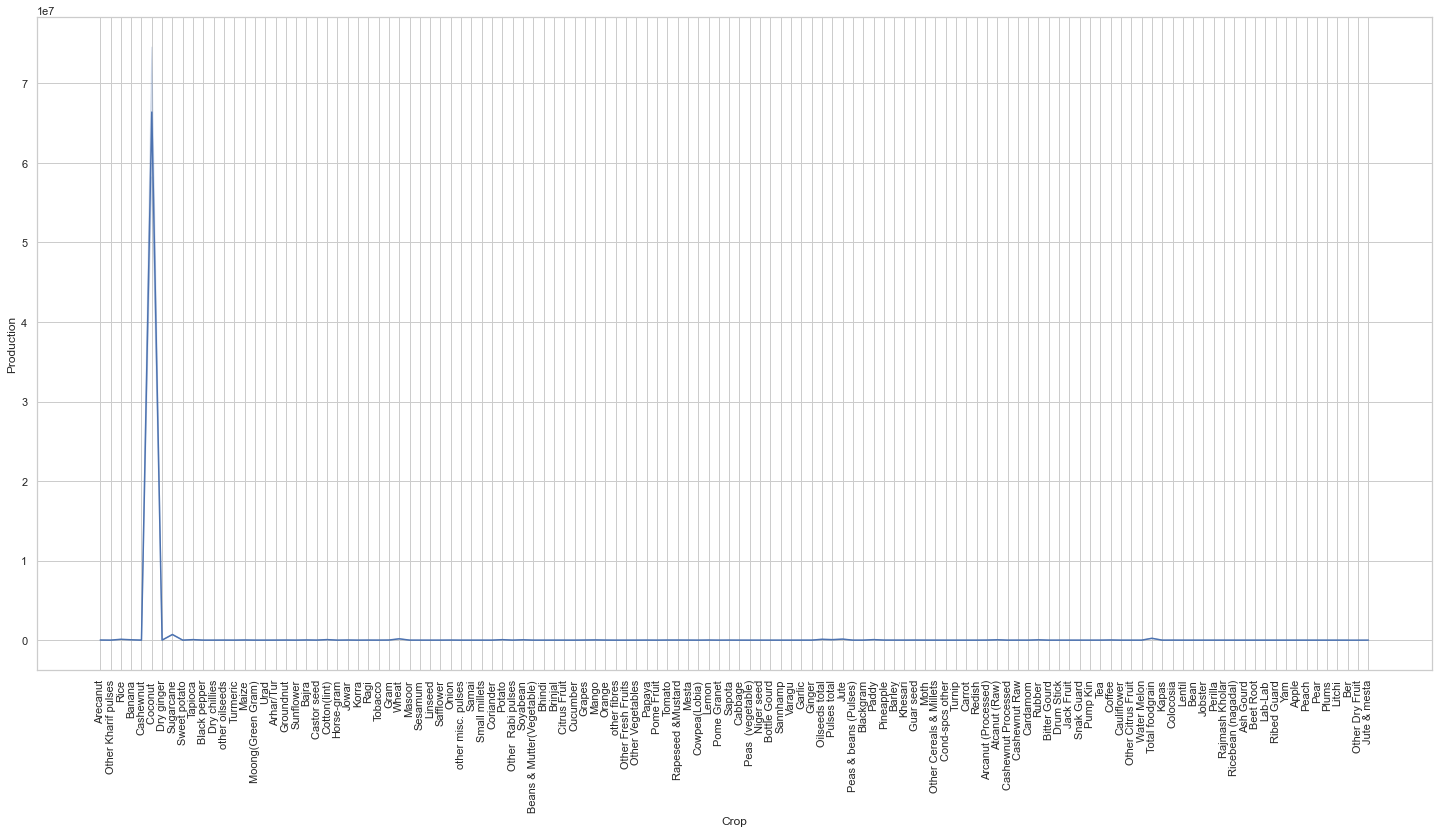

In [64]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25,12))
sns.lineplot(df["Crop"],df["Production"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Crop Vs Production'}, xlabel='Crop_Year', ylabel='Production'>

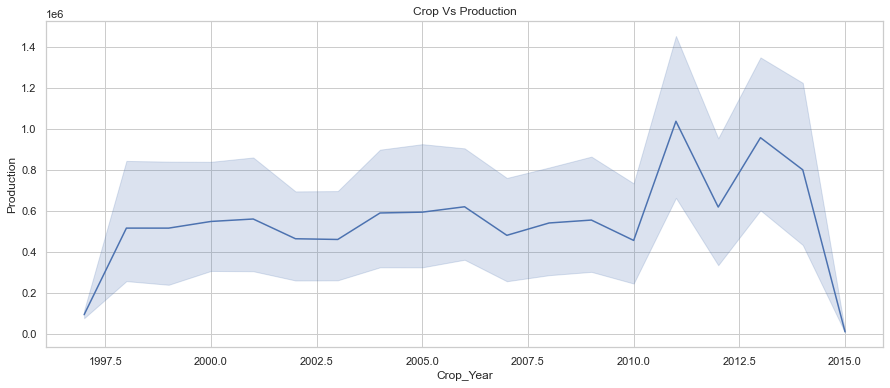

In [63]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,6))
plt.title('Crop Vs Production')
sns.lineplot(df["Crop_Year"],df["Production"])

<AxesSubplot:title={'center':'Crop_yr vs Production'}, xlabel='Crop_Year', ylabel='Production'>

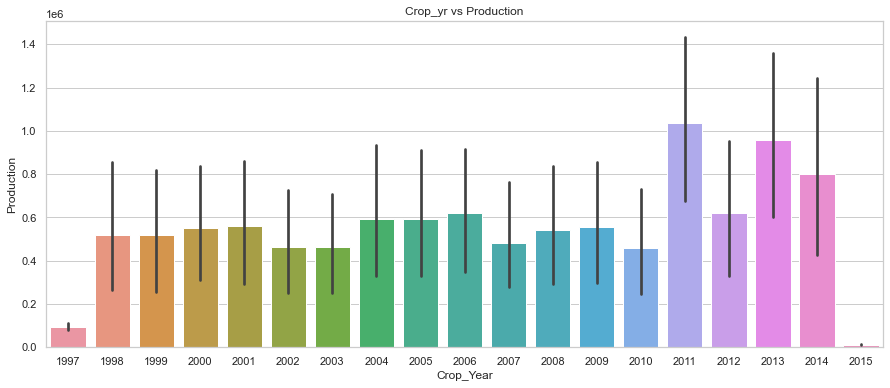

In [62]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,6))
plt.title('Crop_yr vs Production')
sns.barplot(df["Crop_Year"],df["Production"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

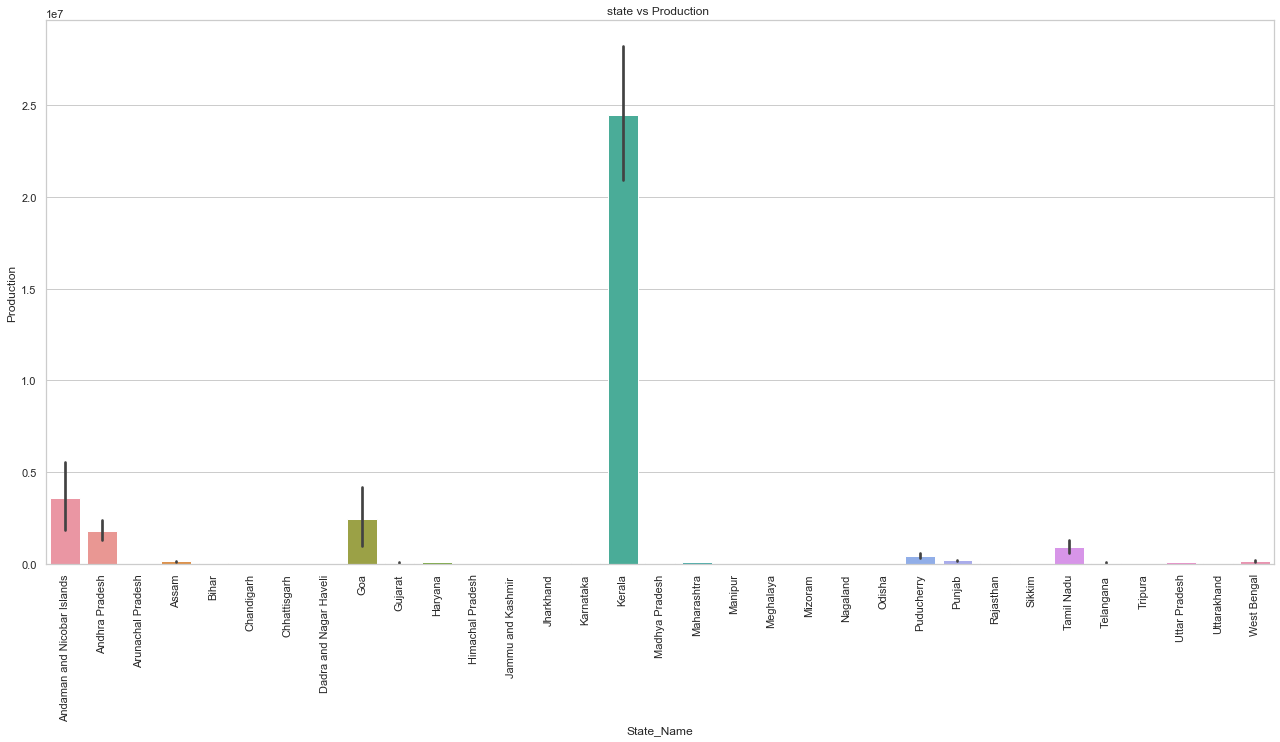

In [60]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(22,10))
plt.title('state vs Production ')
sns.barplot(df["State_Name"],df["Production"])
plt.xticks(rotation=90)

In [37]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

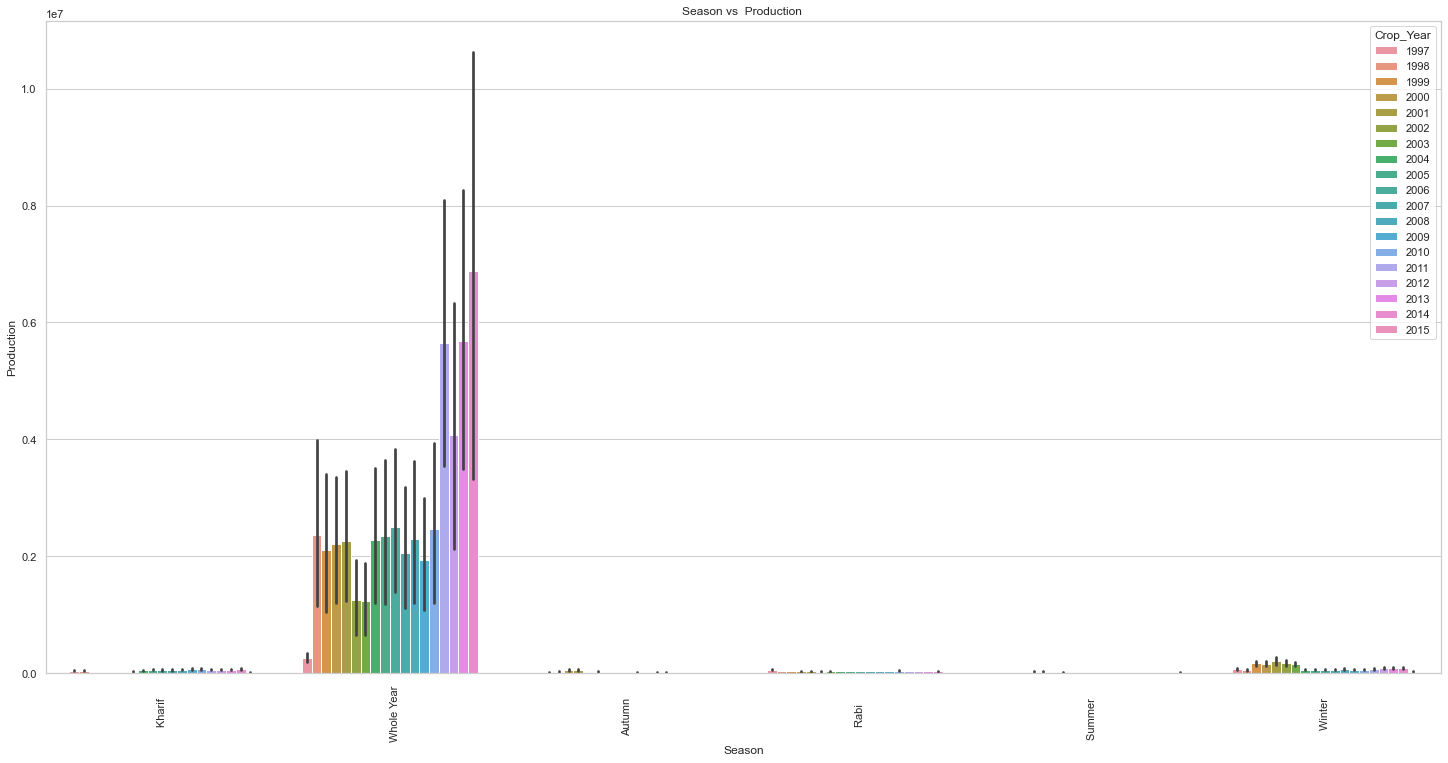

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25,12))
plt.title('Season vs  Production ')
sns.barplot(df["Season"],df["Production"],df['Crop_Year'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

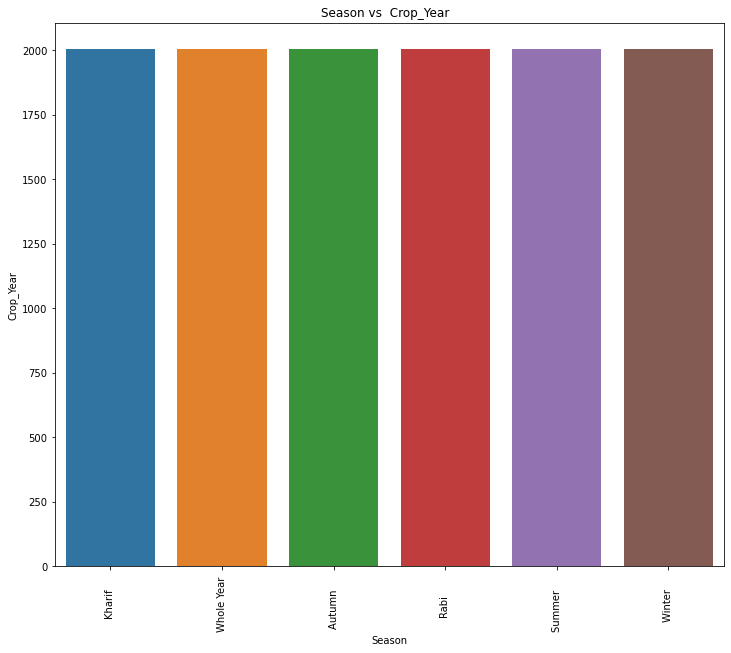

In [59]:
plt.figure(figsize=(12,10))
plt.title('Season vs  Crop_Year  ')
sns.barplot(df["Season"],df['Crop_Year'])
plt.xticks(rotation=90)